# Document Classification of Computer Science Article Abstracts

# Contents

# 1. Introduction 

# 2. Methodology

## 2.1 Webscraping abstracts from core.ac.uk

In [ ]:
# Due to the large amount of requests, I executed this code in a seperate notebook and created a csv file
# below is the code used to create this file

#import requests
#from bs4 import BeautifulSoup as btfs
#import re 
#abstracts = []

#def webscrape(part1,part2):
    #count = 0
    #for i in range(0,201):
        #html = requests.get('https://core.ac.uk/search?q='+part1+'+'+part2+
                            #'+AND+fieldsOfStudy%3A"computer+science"&page='+str(i)).text
        #soup = btfs(html,'html.parser')

        #for link in soup.find_all('span'):
            #if len(str(link)) > 600:
                #text = btfs(str(link),"lxml").text
                #if text[0] != 'ℓ':
                    #if text[0] != '1':
                        #abstracts.append(text[0:300])
                        #count += 1
    #print(count)

In [ ]:
#def webscrape2(part1,part2):
    #count = 0
    #for i in range(201,502):
        #html = requests.get('https://core.ac.uk/search?q='+part1+'+'+part2+
                            #'+AND+fieldsOfStudy%3A"computer+science"&page='+str(i)).text
        #soup = btfs(html,'html.parser')

        #for link in soup.find_all('span'):
            #if len(str(link)) > 600:
                #text = btfs(str(link),"lxml").text
                #if text[0] != 'ℓ':
                    #if text[0] != '1':
                        #abstracts.append(text[0:300])
                        #count += 1
    #print(count)

In [ ]:
#webscrape('reinforcement','learning')

In [ ]:
#webscrape('supervised','learning')

In [ ]:
#webscrape('unsupervised', 'learning')

In [ ]:
#webscrape('inductive','learning')

In [ ]:
#webscrape('transfer','learning')

In [ ]:
#webscrape2('reinforcement','learning')

In [ ]:
#webscrape2('supervised','learning')

In [ ]:
#webscrape2('unsupervised', 'learning')

In [ ]:
#webscrape2('inductive','learning')

In [ ]:
#webscrape2('transfer','learning')

In [ ]:
#labels = ['reinforcement learning' for i in range(1248)]
#[labels.append('supervised learning') for i in range(1399)]
#[labels.append('unsupervised learning') for i in range(1223)]
#[labels.append('inductive learning') for i in range(260)]
#[labels.append('transfer learning') for i in range(879)]
#[labels.append('supervised learning') for i in range(917)]
#[labels.append('unsupervised learning') for i in range(606)]
#[labels.append('transfer learning') for i in range(1099)]

In [ ]:
#import pandas as pd
#data = list(zip(labels,abstracts))
#df = pd.DataFrame(data, columns=['Label','Abstract'])

In [ ]:
#df.to_csv('abstracts.csv', index=False)

In [2]:
# as I am just reading files I will use this method
from google.colab import files
import io

uploaded = files.upload()


Saving abstracts.csv to abstracts.csv


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['abstracts.csv']))

In [4]:
print(df)

                       Label  \
0     reinforcement learning   
1     reinforcement learning   
2     reinforcement learning   
3     reinforcement learning   
4     reinforcement learning   
...                      ...   
7626       transfer learning   
7627       transfer learning   
7628       transfer learning   
7629       transfer learning   
7630       transfer learning   

                                               Abstract  
0     In this article we study the transfer learning...  
1     Cross-situational word learning is based on th...  
2     In recent years, attention has been focused on...  
3     Reinforcement learning is considered to be a s...  
4     Join order selection plays a significant role ...  
...                                                 ...  
7626  The multiple ideal query (MIQ) model was intro...  
7627  Evaluation of business processes plays a signi...  
7628  The design process of complex systems in all t...  
7629  The mobile data traffic has r

In [5]:


# create a new column label_type that corresponds to values in label column
# labels start from 0 due to loss function used in model, there are 5 classes

labeldict = {'reinforcement learning':0,'supervised learning':1,'unsupervised learning':2,'inductive learning':3,'transfer learning':4}

# for each row in the new column, if the corresponding row in Label is a key in the dictionary the row in the new column will be set to 
# the value of the matching key, if not it will be set to 5
for i in range(len(df)):
  df.loc[i,'label_type'] = np.where(df.loc[i,'Label'] in labeldict.keys(), labeldict[str(df.loc[i,'Label'])], 5)


In [62]:
# check that everything was coded correctly, there are no rows with a 5
#print(df.loc[df['label_type']==0])
#print(df.loc[df['label_type']==1])
#print(df.loc[df['label_type']==2])
#print(df.loc[df['label_type']==3])
#print(df.loc[df['label_type']==4])
#print(df.loc[df['label_type']==5])
 

Empty DataFrame
Columns: [Label, Abstract, label_type]
Index: []


In [6]:
def r(data):
  import random
  return random.randint(0,len(data))

# to double check that length of abstracts was sliced correctly (300 words) 
# I printed the length of 20 random abstracts

[print(len(df.iloc[r(df),1])) for i in range(20)]


300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
from keras.preprocessing.text import Tokenizer
#!pip install pad_sequences
from keras_preprocessing.sequence import pad_sequences
from math import trunc

abstracts = list(df['Abstract'])


tokenizer = Tokenizer() # as there is not much data I have not passed the num_words argument
tokenizer.fit_on_texts(abstracts) # builds word index 
sequences = tokenizer.texts_to_sequences(abstracts) # turns each string in abstracts into a sequence/list of integers that correspond to each word in word index

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens') # 17679 unique tokens were found which means there is a vocabulary of 17679 unique words in abstracts


Found 17679 unique tokens


In [32]:
print(abstracts[0])
print(sequences)
print(word_index)

In this article we study the transfer learning model of action advice under a
budget. We focus on reinforcement learning teachers providing action advice to
heterogeneous students playing the game of Pac-Man under a limited advice
budget. First, we examine several critical factors affecting advice q
[[6, 9, 151, 12, 72, 1, 513, 15, 36, 2, 325, 2320, 322, 3, 2783, 12, 355, 10, 126, 15, 1379, 679, 325, 2320, 4, 560, 315, 1156, 1, 283, 2, 4270, 2972, 322, 3, 358, 2320, 2783, 146, 12, 1206, 122, 337, 453, 2420, 2320, 1380], [705, 3592, 434, 15, 7, 22, 10, 1, 1511, 13, 3, 4271, 31, 915, 1, 6299, 2, 3, 434, 19, 667, 3593, 6, 296, 509, 47, 897, 297, 2, 13, 434, 338, 12, 76, 16, 359, 15, 87, 13, 1741, 3, 956, 13, 3904, 1, 2973, 2, 1, 126, 3], [6, 96, 156, 248, 24, 30, 543, 10, 1, 970, 82, 2321, 1653, 7726, 2974, 35, 5, 126, 15, 35, 6, 9, 45, 12, 76, 1, 3162, 2784, 158, 7727, 87, 28, 7, 2975, 144, 8, 2321, 1653, 232, 3346, 6300, 5, 126, 5364], [126, 15, 7, 454, 4, 25, 3, 995, 650, 464, 28, 31, 

In [73]:
# as there are 100 values for each word in the glove word embeddings, sequences will be padded to 100
maxlen = 100
data = pad_sequences(sequences, maxlen=maxlen) 

labels = np.asarray(df['label_type']) 
print(f'Shape of data tensor: {data.shape}') # 7631 rows of sequences with 61 tokens for each sequence (rank 2 tensor)
print(f'Shape of label tensor: {labels.shape}') # 7631 labels (rank 1 tensor)



Shape of data tensor: (7631, 100)
Shape of label tensor: (7631,)


In [64]:
print(labels)

[0. 0. 0. ... 4. 4. 4.]


In [74]:
# creates array of numbers ranging from 0 to the amount of rows in data and uses 
# them to shuffle data and labels while keeping the correct labels with data
indices = np.arange(data.shape[0]) 
np.random.shuffle(indices) 
training_samples = trunc(len(df)*2/3) 
validation_samples = trunc(len(df)*1/3)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples:training_samples+validation_samples+1]
y_val = labels[training_samples:training_samples+validation_samples+1]
  


In [26]:
 
# I will webscrape from another website for the final test data



In [58]:
print(x_train)

[[    0     0     0 ...    20     1  5786]
 [    0     0     0 ...   296    33   275]
 [    0     0     0 ...    14  4462 13110]
 ...
 [    0     0     0 ...    93  1149 16052]
 [    0     0     0 ...  2309   124  5869]
 [    0     0     0 ...     5  1839 12950]]


In [110]:
print(x_train)

[[    0     0     0 ...     5     1  5961]
 [    0     0     0 ...    82     1   971]
 [    0     0     0 ...    26    26   717]
 ...
 [    0     0     0 ...   744    82  1575]
 [    0     0     0 ...   233   137  8801]
 [    0     0     0 ...   720   958 13762]]


Word embeddings will be used due to the computational efficiency of this method compared to one hot encoding methods (reference chollet book). 

As this data is domain specific the model may reach higher accuracy if task-specific word embeddings are generated from scratch. However, there is not much data so using a pre-trained word embedding space may lead to higher accuracy. Therefore, both methods will be tested and hyperparameters of the best performing model will be adjusted for further accuracy improvements.

In [13]:
from google.colab import files
import io

uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [14]:
# every line in the file is split by whitespace, the embeddings_index dictionary
# is updated with the word (which is the first value in each line) as a key and 
# the rest of the line is the word embedding, which is set to the value of the word 
f = open('glove.6B.100d.txt','r')
f = f.readlines()
embeddings_index = {}

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs


print(f'Found {len(embeddings_index)} word vectors')


Found 400000 word vectors


In [102]:
print(list(word_index.keys())[list(word_index.values()).index(17679)])
#list(my_dict.values()).index(100)

interoperation


In [15]:
import itertools as it

embedding_dim = maxlen

# there are 17679 items in the word_index dictionary but this is non-inclusive 
#so the final value is 17678, therefore i will use the last value of the 
# dictionary instead of the length to avoid confusion
max_words = len(word_index)
#embeddings_index = dict(it.islice(embeddings_index.items(), 61))

# an embedding matrix is formed using tokens from the abstracts word index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None: # words not found in embedding index will be kept as zeros
      embedding_matrix[i] = embedding_vector 
      # index/row i of embedding_matrix corresponds to the 100 dim pre-trained 
      # word embedding of words taken from word_index

In [52]:
print(embedding_matrix.shape)


(17679, 100)


In [226]:
print(len(embedding_vector))
print(len(embeddings_index))
print(len(word_index))
print(embedding_vector)

100
400000
17679
[ 0.12963    0.20751   -0.1283     0.65678   -0.012602  -0.0039154
  0.051409  -0.20766    0.20313   -0.07864   -0.30771    0.37049
  0.062305  -0.30271    0.40425   -0.0036315 -0.093847  -0.10372
  0.25864    0.042573  -0.69939   -0.53403   -0.10409   -0.45273
 -0.088488  -0.19253   -0.017728   0.58291   -0.033859  -0.094179
 -0.34669   -0.15549    0.11419   -0.4686     0.23635   -0.075947
  0.34957   -0.40404   -0.21637    0.27944    0.60423   -0.066711
  0.077235   0.074802  -0.40806   -0.061798  -0.16674   -0.036793
  0.23644    0.18938    0.27648    0.12752   -0.41738    0.10046
  0.45581    0.77297    0.3291    -0.065221  -0.28497   -0.36544
 -0.11755   -0.62054    0.40694   -0.31639   -0.31485    0.50455
 -0.35053   -0.26845   -0.041309  -0.20729    0.063541   0.34516
  0.23168    0.40315   -0.013478   0.14579    0.14884   -0.43213
  0.5175     0.017256  -0.26903    0.27816    0.43975    0.37687
  0.13276    0.28261   -0.19977   -0.16437    0.097386   0.087377
 

In [80]:
print(embedding_matrix[5,72])

0.0595179982483387


# Error analysis
Using max_words = 17679, which is the amount of words in the vocabularly of the abstracts data, led to an error (indices[5,72] = 17679 is not in [0, 17679]).  A value of 17679 would not be in [0,17679] as this is a non-inclusive interval so the interval would need to be changed to 17679 or this value would need to be removed. 

I checked this indecides for both the data and embedding matrix and neither were 17679. I also checked the word_index dictionary to find the maximum value, which is indeed 17679. I considered finding the row/rows that had this number and changing them to zeros but decided on another method that would cause the least information loss, also, the indices array I created is one dimensional so I assume that the indices of this error is referring to one of the layers of the model.

So I made the input_dim 17680 (max_words+1) and added an extra row of zeros to the embedding matrix/weight matrix to accomodate value 17679, which fixed the error. 

# Model 1

This model will utilise a mini-batch supervised learning algorithm to learn a function that seperates sequences of word vectors into 5 different classes/categories. The parameters of this function are the weights and biases.

Model 1 = $ f(x) = \sigma ({\textbf{W}}_{ix}^{3}(R({\textbf{I}}_{ij}{\textbf{W}}_{ik}^{2})))) $

where:

j = flattened = $ {\textbf{I}}_{ij}{\textbf{W}}_{j*}^{1} \hspace{0.25cm} \mathbb{N}_{j} = $ { 0,1,...,j } $\hspace{0.25cm}$ j* = all columns of jth row 

W = weight = kernel =  n x 100 pretrained word embedding matrix

I = input = n x 100 sequence matrix

$ \sigma $ = softmax

R = ReLu


# Forward propagation

## Input layer

The input layer is an embedding layer, so weights at this layer consist of a matrix where the row/embedding at index j corresponds to the jth word index in the sequence matrix. Weights at this layer are pretrained and are not updated during gradient descent. 

The matrix is flattened which multiplies the word indicies for each sequence with their corresponding embedding. 

## Hidden layer

The input matrix is multipled by a randomly generated weight matrix of dimension n x 32 which transforms the input to an n x 32 dimension matrix.

A ReLu activation function is then applied to the matrix at this layer

ReLu essentially activates the non-linear relationship between the inputs and corresponding outputs which creates a differentiable non-linear function with local and global minima that allow the function to be optimized

## Output layer

At the output layer the incoming matrix is multipled by an n x 5 matrix of random values, a softmax function is then applied which outputs values between 0 and 1. These values correspond to the probability that the given sequence belongs to each class.

# Backwards Propagation

This model utilises root mean squared propagation (rmsprop) with sparse categorical crossentropy (scc) to calculate the loss/error. Scc was chosen due to there being 5 integer classes rather than 2 binary classes or one hot encoded classes, scc calculates how much the actual output deviated from the desired output by calculated the negative log-liklihood or cross entropy (deep learning bengio book). Rmsprop adjusts the learning rate according to a moving average of partial derivatives in order to speed up learning, this allows the algorithm to converge to a local or global minimum faster. the learning rate, $ \alpha $, is thus calculated as $ \alpha 

On the first epoch the output will be the result of random weight initializations (which are random small numbers sampled from a uniform distribution by default)

## Output layer

The error at this layer is calculated via categorical cross entropy

E = $ -\sum_{i=1}^{n} y_{i}log(\hat{y}_{i}) $

where:

n = number of classes

$ y_{i} $ = desired outputs for each sample

$ \hat{y}_{i} $ = actual outputs for each sample

weights are updated via rmsprop

$ W_{i}^{3} = W_{i}^{3} - \alpha \frac{dW}{\sqrt{S_{dW}+\epsilon }} $

where:

$ dW_{i}^{3} $ = partial derivative of how much each weight changed with respect to the error at this layer

$ S_{dW} = \beta S_{dW}prev + (1-\beta )dw^{2} $

as the actual output minus the desired output. The derivative of the error with respect to the weights signifies how much the weights contributed to this error. The weights are then updated via rmsprop

derivative of loss function with respect to weights of the output layer


## Hidden layer
The derivative of the relu function

$ W_{i}^{2} = W_{i}^{2} - \alpha \frac{dW}{\sqrt{S_{dW}+\epsilon }} $

where:

$ dW_{i}^{2} $ = partial derivative of how much each weight of this layer changed with respect to the error at the output

## Input layer
weights in the input layer are not trainable/fixed

So the model will backpropgate through each layer using sparse or multi-class cross entropy (as embeddings with float values have been used rather than one hot encoding of words) to find the gradient of the error function/error (except the input layer which has pre-trained weights). It does this by finding the derivative of the error (the difference between teh correct label and the outputted label) with respect to the weights at each layer. Weights will then be updated using gradient descent with rmsprop. This is a batch algorithm as all inputs go through the network before weights are updated. The weights are initialized as small values then the error is added when updated, so the aim of this network is to minimize the error using sparse crossentropy and optimize the weights using rmsprop.

In [75]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=100)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax')) # explain why changed to softmax 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1768000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 32)                320032    
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,088,197
Trainable params: 2,088,197
Non-trainable params: 0
_________________________________________________________________


In [124]:
matrix = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])
print(matrix.shape)
newrow = np.zeros(3)
#print(newrow)
matrix = np.vstack([newrow,matrix])
print(matrix.shape)
print(embedding_matrix.shape)
#newrow = [1, 2, 3]
#A = numpy.vstack([A, newrow])

(3, 3)
(4, 3)
(17679, 100)


In [76]:
B = np.zeros(100)
embedding_matrix2 = np.vstack([B,embedding_matrix])

model.layers[0].set_weights([embedding_matrix2])
model.layers[0].trainable = False # during backpropgation this layer is not updated

In [239]:
print(pd.DataFrame(x_train).max())

0         0
1         0
2         9
3        20
4       347
      ...  
56    17518
57    17660
58    17578
59    17579
60    17677
Length: 61, dtype: int32


In [77]:
model.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/20
159/159 [==============================] - 2s 12ms/step - loss: 1.4972 - acc: 0.2805 - val_loss: 1.4832 - val_acc: 0.2995
Epoch 2/20
159/159 [==============================] - 2s 11ms/step - loss: 1.3702 - acc: 0.3782 - val_loss: 1.5089 - val_acc: 0.2638
Epoch 3/20
159/159 [==============================] - 2s 11ms/step - loss: 1.2364 - acc: 0.4631 - val_loss: 1.6497 - val_acc: 0.2685
Epoch 4/20
159/159 [==============================] - 2s 10ms/step - loss: 1.0968 - acc: 0.5304 - val_loss: 1.7043 - val_acc: 0.2327
Epoch 5/20
159/159 [==============================] - 2s 11ms/step - loss: 0.9507 - acc: 0.6163 - val_loss: 1.8292 - val_acc: 0.2311
Epoch 6/20
159/159 [==============================] - 2s 11ms/step - loss: 0.8054 - acc: 0.6821 - val_loss: 2.0896 - val_acc: 0.2445
Epoch 7/20
159/159 [==============================] - 2s 11ms/step - loss: 0.6975 - acc: 0.7305 - val_loss: 2.2233 - val_acc: 0.2131
Epoch 8/20
159/159 [==============================] - 2s 10ms/step - 

As there are 5 classes there is a 20% (0.2 or 1/5) chance that the network will predict the correct answer, thus, the model overfit on the test data which essentially led to random guesses on the validation data

I will now plot the results

In [80]:
# class to plot results for all models
import matplotlib.pyplot as plt

class plot_results:
  def __init__(self, acc, val_acc, loss, val_loss, epochs=range(1, len(acc)+1)):
    self.acc = acc
    self.val_acc = val_acc
    self.loss = loss
    self.val_loss = val_loss
    self.epochs = epochs

  def results(self):
    plt.plot(self.epochs, self.acc, 'bo', label='Training acc')
    plt.plot(self.epochs, self.val_acc, 'b', label='Validation acc')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(self.epochs, self.loss, 'bo', label='Training loss')
    plt.plot(self.epochs, self.val_loss, 'b', label='Validation loss')
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    

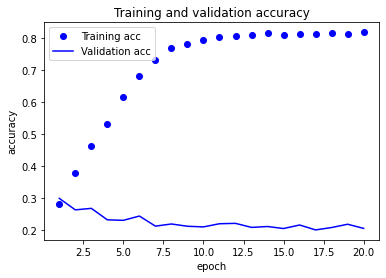

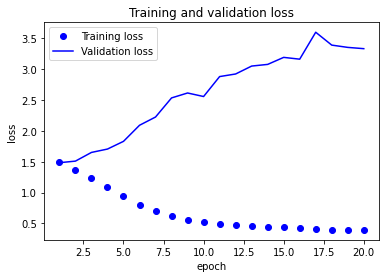

In [81]:
model1 = plot_results(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])
model1.results()

The model closely overfit to the training data which led to very poor performance on the validation data, with accuracy amounting to a random guess. This is possibly due tot he specialized nature of the sequences which would not have been fully mapped to the glove word embeddings, there must have been a large amount of information loss meaning there must have been many 0's in the dataset which have no meaning to the model. Sequences were also padded with 0's to match the word embedding data and an extra row of zeros was added to the weight vector at the input layer.

# Model 2

I will now create word embeddings from scratch using the abstracts data

In [43]:
# check if the lengths stayed the same
[print(len(sequences[r(sequences)])) for i in range(20)]

44
47
47
41
44
46
40
44
42
44
46
43
43
42
50
48
42
46
44
45


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [82]:
data2 = pad_sequences(sequences) # sequences will be padded to longest sequence in list

data2 = data2[indices]

x_train2 = data2[:training_samples]
x_val2 = data2[training_samples:training_samples+validation_samples+1] # dimensions changed due to no longer using glove word embeddings


In [67]:
print(x_train.shape)

(5087, 100)


In [83]:
sequence_vector = len(data2[1])

model2 = Sequential()
model2.add(Embedding(max_words+1, sequence_vector, input_length=sequence_vector)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model2.add(Flatten())
model2.add(Dense(32,activation='relu'))
model2.add(Dense(5,activation='softmax')) 
model2.summary()

model2.compile(optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history2 = model2.fit(x_train2, y_train, epochs=20, batch_size=32, validation_data=(x_val2, y_val))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 61, 61)            1078480   
                                                                 
 flatten_7 (Flatten)         (None, 3721)              0         
                                                                 
 dense_14 (Dense)            (None, 32)                119104    
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,197,749
Trainable params: 1,197,749
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
159/159 [==============================] - 3s 15ms/step - loss: 1.4735 - acc: 0.3043 - val_loss: 1.4508 - val_acc: 0.3035
Epoch 2/20
159/159 [=======================

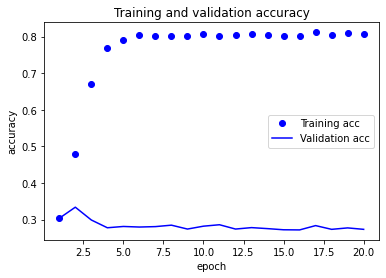

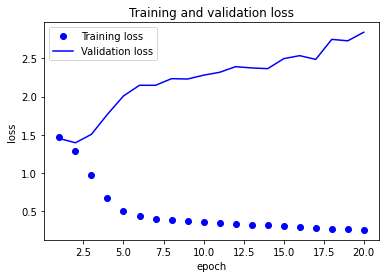

In [88]:
model2 = plot_results(history2.history['acc'],history2.history['val_acc'],history2.history['loss'],history2.history['val_loss'])
model2.results()

In [103]:
from tensorflow.keras import regularizers
model3 = Sequential()
model3.add(Embedding(max_words+1, sequence_vector, input_length=sequence_vector)) #input_dim = amount of possible words output_dim = pretrained weights applied to input
model3.add(Flatten())
model3.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model3.add(Dense(5,activation='softmax')) 
model3.summary()

model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics=['acc'])

history3 = model3.fit(x_train2, y_train, epochs=20, batch_size=32, validation_data=(x_val2, y_val))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 61, 61)            1078480   
                                                                 
 flatten_21 (Flatten)        (None, 3721)              0         
                                                                 
 dense_40 (Dense)            (None, 32)                119104    
                                                                 
 dense_41 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,197,749
Trainable params: 1,197,749
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
159/159 [==============================] - 5s 28ms/step - loss: 1.4843 - acc: 0.2970 - val_loss: 1.4663 - val_acc: 0.2948
Epoch 2/20
159/159 [======================

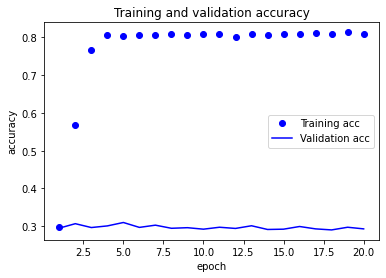

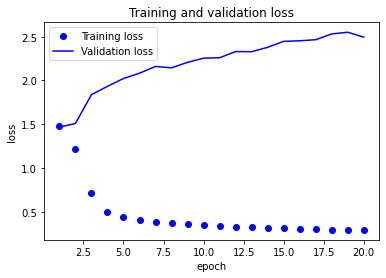

In [104]:
model3 = plot_results(history3.history['acc'],history3.history['val_acc'],history3.history['loss'],history3.history['val_loss'])
model3.results()

In [ ]:
I can use a higher learning rate due to rmsprop which may help learn